In [1]:
import torchaudio

import IPython
import matplotlib.pyplot as plt

# Additive noise

In [3]:
from wavencoder.transforms import AdditiveNoise

add = AdditiveNoise('/home/shangeth/Downloads/Dataset/DLIVING_16k/DLIVING')
audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

noisy = add(audio)
audio.shape, noisy.shape

(torch.Size([1, 45261]), torch.Size([1, 45261]))

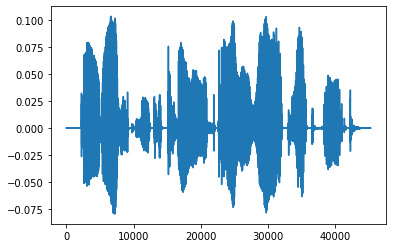

In [4]:
plt.plot(audio.reshape(-1))
plt.show()

IPython.display.Audio(audio.reshape(-1), rate=16000)

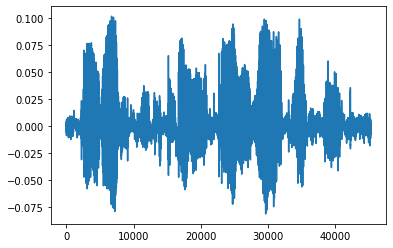

In [5]:
plt.plot(noisy.reshape(-1))
plt.show()

IPython.display.Audio(noisy.reshape(-1), rate=16000)

# Speed

In [6]:
from wavencoder.transforms import SpeedChange

speed = SpeedChange(factor_range=(-0.9, 0.0))
audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

speedy = speed(audio)

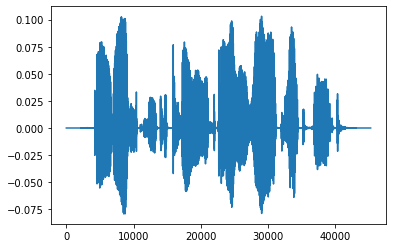

In [7]:
plt.plot(speedy.reshape(-1))
plt.show()

IPython.display.Audio(speedy.reshape(-1), rate=16000)

# Clipping

In [8]:
from wavencoder.transforms import Clipping

clip = Clipping()
audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

clipped = clip(audio)

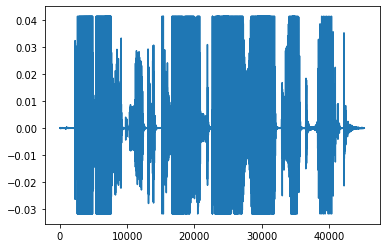

In [9]:

plt.plot(clipped.reshape(-1))
plt.show()

IPython.display.Audio(clipped.reshape(-1), rate=16000)

# Pad-Crop

In [10]:
from wavencoder.transforms import Pad, Crop, PadCrop

pad_crop = PadCrop(16000)
audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

pad_cropped = pad_crop(audio)

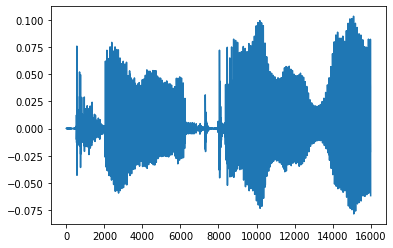

In [11]:

plt.plot(pad_cropped.reshape(-1))
plt.show()

IPython.display.Audio(pad_cropped.reshape(-1), rate=16000)

# Reverbaration

In [12]:
from wavencoder.transforms import Reverberation

reverb = Reverberation('/home/shangeth/Downloads/pySpeechRev/IR_examples/wav', 3000)
audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

reverbed = reverb(audio)

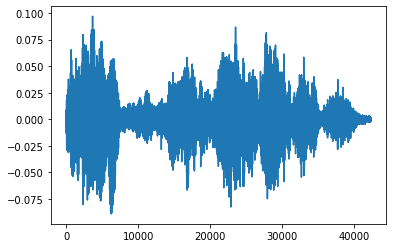

In [13]:

plt.plot(reverbed.reshape(-1))
plt.show()

IPython.display.Audio(reverbed.reshape(-1), rate=16000)

# Compose

In [14]:
from wavencoder.transforms import Compose, AdditiveNoise, SpeedChange, Clipping, PadCrop, Reverberation

audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

transforms = Compose([AdditiveNoise('/home/shangeth/Downloads/Dataset/DLIVING_16k/DLIVING'),
                     SpeedChange(factor_range=(-0.5, 0.0)),
                     Clipping(),
                     PadCrop(48000), 
                     Reverberation('/home/shangeth/Downloads/pySpeechRev/IR_examples/wav', 3000)])

transformed_audio = transforms(audio)

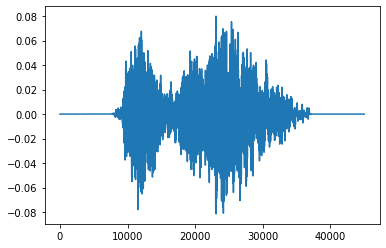

In [15]:
import IPython
import matplotlib.pyplot as plt

plt.plot(transformed_audio.reshape(-1))
plt.show()

IPython.display.Audio(transformed_audio.reshape(-1), rate=16000)

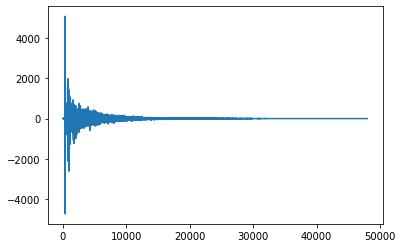

In [16]:
import scipy.io as io

npy = io.loadmat('/home/shangeth/Downloads/IR1.mat')['risp_imp']

plt.plot(npy)
plt.show()
IPython.display.Audio(npy.reshape(-1), rate=16000)

In [17]:
import os
import scipy.io as io
from scipy.io.wavfile import write

ir_path = '/home/shangeth/Downloads/pySpeechRev/IR_examples'
files = os.listdir(ir_path)

for file in files:
    data = io.loadmat(os.path.join(ir_path, file))['risp_imp']
    write(os.path.join(ir_path, f"{file.split('.')[0]}.wav"), 16000, data)
    

FileNotFoundError: [Errno 2] No such file or directory: '/home/shangeth/Downloads/pySpeechRev/IR_examples/wav.mat'

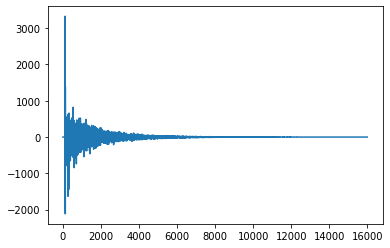

In [7]:


npy = io.loadmat('/home/shangeth/Downloads/IR1_16.mat')['risp_imp']

plt.plot(npy)
plt.show()
IPython.display.Audio(npy.reshape(-1), rate=16000)

# Testing

In [3]:
import torchaudio
import IPython
import matplotlib.pyplot as plt

torchaudio.sox_effects.effect_names()

['allpass',
 'band',
 'bandpass',
 'bandreject',
 'bass',
 'bend',
 'biquad',
 'chorus',
 'channels',
 'compand',
 'contrast',
 'dcshift',
 'deemph',
 'delay',
 'dither',
 'divide',
 'downsample',
 'earwax',
 'echo',
 'echos',
 'equalizer',
 'fade',
 'fir',
 'firfit',
 'flanger',
 'gain',
 'highpass',
 'hilbert',
 'input',
 'loudness',
 'lowpass',
 'mcompand',
 'noiseprof',
 'noisered',
 'norm',
 'oops',
 'output',
 'overdrive',
 'pad',
 'phaser',
 'pitch',
 'rate',
 'remix',
 'repeat',
 'reverb',
 'reverse',
 'riaa',
 'silence',
 'sinc',
 'speed',
 'splice',
 'stat',
 'stats',
 'stretch',
 'swap',
 'synth',
 'tempo',
 'treble',
 'tremolo',
 'trim',
 'upsample',
 'vad',
 'vol']

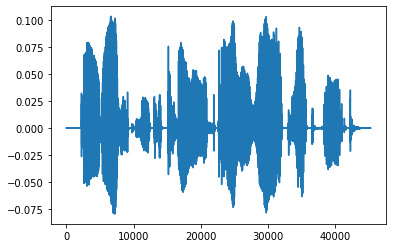

In [4]:
audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')
plt.plot(audio.reshape(-1))
plt.show()

IPython.display.Audio(audio.reshape(-1), rate=16000)

In [9]:
import torchaudio
# from torchaudio.sox_effects import apply_effects_tensor

new_audio = torchaudio.sox_effects.apply_effects_tensor(audio, 16000, ['reverb'])
plt.plot(new_audio.reshape(-1))
plt.show()

IPython.display.Audio(new_audio.reshape(-1), rate=16000)

AttributeError: module 'torchaudio.sox_effects' has no attribute 'apply_effects_tensor'

In [14]:
dir(torchaudio.sox_effects.sox_effects)

['Any',
 'Callable',
 'List',
 'Optional',
 'SoxEffect',
 'SoxEffectsChain',
 'Tensor',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_misc_ops',
 '_mod_utils',
 '_torchaudio',
 'effect_names',
 'init_sox_effects',
 'shutdown_sox_effects',
 'torch']